# Практическая работа №1: Формирование и первичная обработка выборки. Ранжированный и интервальный ряды

Выполнили студенты гр. 0381 Котов Дмитрий и Михайлов Виктор. Вариант №8

## Цель работы

Ознакомление с основными правилами формирования выборки и подготовки выборочных данных к статистическому анализу.

## Основные теоретические положения

## Основные теоретические положения

Ранжированный ряд – это распределение отдельных единиц совокупности
в порядке возрастания или убывания исследуемого признака. Ранжирование позволяет легко разделить количественные данные по группам, сразу обнаружить
наименьшее и наибольшее значения признака, выделить значения, которые чаще
всего повторяются.

Вариационный ряд – последовательность значений заданной выборки $x^m = (x_1,\cdots,x_m)$, расположенных в порядке неубывания: $x^{(1)} \leq x^{(2)} \leq \cdots  \leq x^{(m)}$

Интервальный ряд распределения – это таблица, состоящая из двух столбцов (строк) – интервалов варьирующего признака $X_i$ и числа единиц совокупности, попадающих в данный интервал (частот - $f_i$), или долей этого числа в общей
численности совокупностей (частостей - $d_i$).

Полигоном частот называют ломанную, отрезки которой соединяют точки $(x_1,n_1), (x_2,n_2), \cdots , (x_k,n_k)$. Для построения полигона частот на оси абсцисс откладывают варианты $x_i$, а на оси ординат – соответствующие им частоты $n_i$. Точки $(x_i,n_i)$ соединяют отрезками прямых и получают полигон частот.

Гистограммой частот (частостей) называется ступенчатая фигура, состоящая из прямоугольников с основаниями, равными интервалам значений $h_i$ и высотами, равными отношению частот (или частостей) к шагу.

Эмпирической функцией распределения, построенной по выборке $x^m = (x_1,\cdots,x_m)$ объема $m$, называется случайная функция $\widehat{F}_m(x)$, равная

$\widehat{F}_m(x) = \frac{1}{m} \displaystyle\sum_{i=1}^{m}I_{\{x_i < x\}}$

Значения эмпирической функции распределения принадлежат отрезку [0,1].


## Постановка задачи

Осуществить формирование репрезентативной выборки заданного объема из имеющейся генеральной совокупности экспериментальных данных. Осуществить последовательное преобразование полученной выборки в ранжированный, вариационный и интервальный ряды. Применительно к интервальному ряду построить и отобразить графически полигон, гистограмму и эмпирическую функцию распределения для абсолютных и относительных частот. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

###1. Для выполнения работы был выбран язык программирования Python, т.к. он обладает широким набором инструментов и библиотек для анализа данных.

### Импорт библиотек

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Генеральная совокупность взята по следующей ссылке: https://se.moevm.info/lib/exe/fetch.php/courses:statistical_methods_of_experimental_data_handling:sample.zip

### 3. Из генеральной совокупности сформирована выборка заданного объёма 118

In [126]:
data = pd.read_csv("/content/sample.csv")
data = data.sample(n=118, random_state=118)
data = data.sort_index()
data = data.reset_index(drop=True)
data.to_csv("/content/выборка.csv", index=False)

In [127]:
df = pd.read_csv("/content/выборка.csv")
df

,nu,E
0,426,119.0
1,393,103.2
2,506,158.4
3,393,122.8
4,411,112.9
...,...,...
113,424,117.1
114,358,98.3
115,550,147.9
116,377,96.0


###4. Последовательно преобразовуем выборку в ранжированный, вариационный и интервальный ряды.
Выборка только для $nu$:

In [128]:
df_nu = df.drop("E", axis=1)
df_nu.head()

,nu
0,426
1,393
2,506
3,393
4,411


Ранжированный ряд:

In [129]:
df_nu = df_nu.sort_values(by=["nu"], ignore_index = True)
df_nu

,nu
0,331
1,340
2,345
3,352
4,352
...,...
113,566
114,569
115,572
116,576


Вариационный ряд:

In [130]:
x = df_nu['nu']
var_series = pd.DataFrame({'nu': x.value_counts().sort_index().index})
var_series # Вариационный ряд

,nu
0,331
1,340
2,345
3,352
4,358
...,...
86,566
87,569
88,572
89,576


Интервальный ряд:

In [131]:
# Интервальный ряд
n=118
k = int(np.floor(1+3.31*np.log10(n))) # количество интервалов
h = int(np.ceil((max(x)-min(x))/k)) # ширина интервала
interval_bounds = [] # границы интервалов
x_min = min(var_series['nu'])
interval_bounds.append(x_min)
for i in range(1, k):
  interval_bounds.append(x_min+h*i)
interval_bounds.append(x_min+k*h)

counts = x.value_counts().sort_index().values # абсолютные частоты
rel_counts = x.value_counts(normalize=True).sort_index().values # относительные частоты

interval_series = pd.concat([var_series, pd.DataFrame({'n_i': counts, 'p_i': rel_counts})], axis=1)
interval_series["interval_i-i+1"] = pd.cut(interval_series["nu"], bins=interval_bounds, right=False)
interval_series = interval_series.groupby(["interval_i-i+1"])[["n_i", "p_i"]].apply(sum).reset_index()
interval_series["avg_i"] = np.array([np.mean([interval_bounds[i], interval_bounds[i+1]], axis=0) for i in range(k)])
interval_series = interval_series[["interval_i-i+1", "avg_i", "n_i", "p_i"]]

In [132]:
# Добавим накопленные частоты
n_cum = [] # накопленные абсолютные частоты
p_cum = [] # накопленные относительные частоты

n_abs, p_abs = interval_series['n_i'], interval_series['p_i']

for i in range(len(n_abs)):
  n_cum.append(sum(n_abs[:i+1]))
  p_cum.append(sum(p_abs[:i+1]))

interval_series['n_cum_i'] = n_cum
interval_series['p_cum_i'] = p_cum
interval_series

,interval_i-i+1,avg_i,n_i,p_i,n_cum_i,p_cum_i
0,"[331, 369)",350.0,9.0,0.076271,9.0,0.076271
1,"[369, 407)",388.0,17.0,0.144068,26.0,0.220339
2,"[407, 445)",426.0,29.0,0.245763,55.0,0.466102
3,"[445, 483)",464.0,29.0,0.245763,84.0,0.711864
4,"[483, 521)",502.0,15.0,0.127119,99.0,0.838983
5,"[521, 559)",540.0,14.0,0.118644,113.0,0.957627
6,"[559, 597)",578.0,5.0,0.042373,118.0,1.000000


| $i$ | $[x_i,x_{i+1})$ | $\widetilde{x}_i$ | $n_i$ | $p^{*}_i$ | $n^{Σ}_i$ | $p^{Σ}_i$ |
|-----|-----------------|-------------------|-------|-----------|-----------|-----------|
|  1  |      [331, 369) |             350.0 |   9.0 |  0.076271 |       9.0 |  0.076271 |
|  2  |      [369, 407) |             388.0 |  17.0 |  0.144068 |      26.0 |  0.220339 |
|  3  |      [407, 445) |             426.0 |  29.0 |  0.245763 |      55.0 |  0.466102 |
|  4  |      [445, 483) |             464.0 |  29.0 |  0.245763 |      84.0 |  0.711864 |
|  5  |      [483, 521) |             502.0 |  15.0 |  0.127119 |      99.0 |  0.838983 |
|  6  |      [521, 559) |             540.0 |  14.0 |  0.118644 |     113.0 |  0.957627 |
|  7  |      [559, 597) |             578.0 |   5.0 |  0.042373 |     118.0 |  1.000000 |

**Выводы по пункту 4**: как абсолютные так и относительные частоты растут от наименьшего интервала к среднему, а затем убывают, из чего можно выдвинуть гипотезу о нормальности распределения

###5. Для абсолютных и относительных частот построим и отобразим графически полигон, гистограмму и эмпирическую функцию

In [133]:
intervals = [[] for i in range(k)]
for value in range(k):
  intervals[value].append(interval_bounds[value])
  intervals[value].append(interval_bounds[value+1])

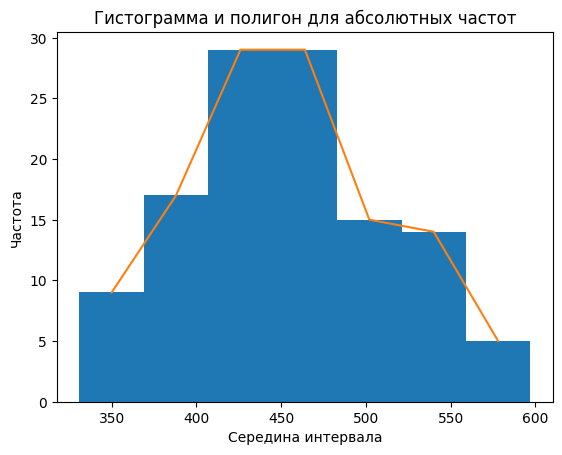

In [134]:
fig, ax = plt.subplots()
ax.hist(x, bins=interval_bounds)
x_polygon = [(border[0] + border[1]) / 2 for border in intervals]
y=interval_series['n_i']
ax.plot(x_polygon, y)
plt.title('Гистограмма и полигон для абсолютных частот')
plt.xlabel('Середина интервала')
plt.ylabel('Частота')
plt.show()

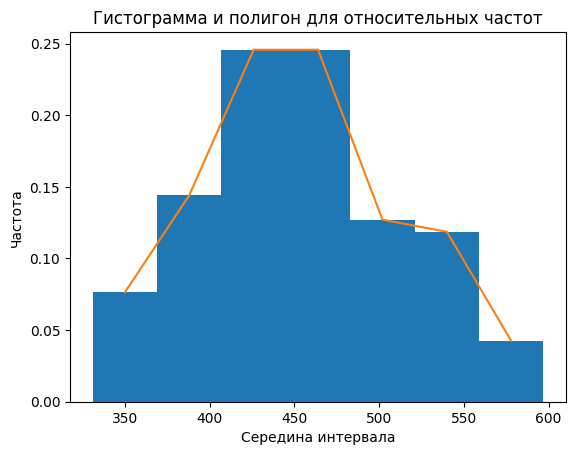

In [136]:
fig, ax = plt.subplots()
ax.hist(x, bins=interval_bounds, weights=np.ones(len(x)) / len(x))
ax.plot(x_polygon, interval_series['p_i'])
plt.title('Гистограмма и полигон для относительных частот')
plt.xlabel('Середина интервала')
plt.ylabel('Частота')
plt.show()


In [139]:
import matplotlib as mpl
def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])

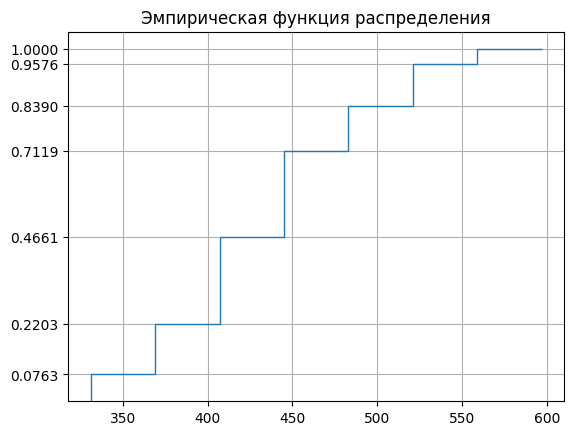

In [152]:
fig, ax = plt.subplots()
ax.hist(x, bins=interval_bounds, histtype='step',  density=True, cumulative=True)
fix_hist_step_vertical_line_at_end(ax)
plt.title('Эмпирическая функция распределения')
plt.grid()
plt.yticks(interval_series['p_cum_i'])
plt.show()

**Выводы по пункту 5**: Графики гистограммы и полигона для абсолютных и относительных частот пропорциональны. График эмпирической функции определяется однозначно, поскольку он отнормирован от 0 до 1. Также из графиков видно что выборка скорее вероятно имеет нормальное распеделение.

## Выводы

В ходе работы выборка была преобразована в ранжированный, вариационный и интервальный ряды. Были построены гистаграммы и полигоны частот и эмпирическая функция распределения для выборки. Данные были подготовлены для статического анализа. Построение вариационного ряда показало, что отобранная случайным образом выборка оказалась достаточно разнообразной. Из построенных графиков были сделаны выводы о том, что выборка скорее всего имеет нормальное распределение.